In [110]:
import os
import pandas as pd
import pdb
import time

cnt = 0
#score = 0.0

path = 'StackPreds/TopN_XGB/'

xgb_topn_repo = {}      
#select_to_essemble = [] # this will affect the scatter plotting later
select_to_essemble = ['9860_meta_ensemble_1520434451_1520005508_2_1520435392.csv.gz',
                     '9865_xgb_ensemble_1520460207_1520444908_1520438638_3_1520460999.csv.gz']

# 9869_xgb_meta_ensemble_1520435392_1520460999__2_1520461403.csv.gz
# 1. 9860_meta_ensemble_1520434451_1520005508_2_1520435392.csv.gz
# 2. 9865_xgb_ensemble_1520460207_1520444908_1520438638_3_1520460999.csv.gz

# 9868_xgb_meta_ensemble_1520435392_1520435392_2_1520446721.csv.gz
# 1. 9860_meta_ensemble_1520434451_1520005508_2_1520435392.csv.gz
# 2. 9863_xgb_ensemble_two_rnn_9842_15204449085_1520438638_2_1520446259.csv.gz

# 9865_xgb_ensemble_1520460207_1520444908_1520438638_3_1520460999.csv.gz
# 1. 9842_rnn_w_conv_840B_300d_ep4_1520444908.csv
# 2. 9842_ModelName.RNN__ep6_fasttext_datagen_200_300_1520438638.csv
# 3. 9832_rnn_w_conv_twitter_1520460207.csv

# 9863_xgb_ensemble_two_rnn_9842_15204449085_1520438638_2_1520446259.csv.gz
# 1. 9842_rnn_w_conv_840B_300d_ep4_1520444908.csv
# 2. 9842_ModelName.RNN__ep6_fasttext_datagen_200_300_1520438638.csv

# 9862_xgb_meta_ensemble_1520437955_1520005508_2_1520438218.csv.gz
# 1. 9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz
# 2. 9857_xgb_ensemble_5_1520005508.csv.gz

# 9860_xgb_ensemble_1520432483_1520431835_1518834132_3_1520437955.csv.gz
# 1. 9840_ModelName.RNN__ep4_fasttext_datagen_200_300_1520432483.csv
# 2. 9836_noscaled_xgb_top8__0.98852106_1520431835.csv
# 3. 9839_sub_FastText_cleaned_200_300_50_50_0.1_32_6_1518834132.csv

# 9860_meta_ensemble_1520434451_1520005508_2_1520435392.csv.gz 
# 1. 9857_xgbstack1520431835_noscaleposweight_rnn_ep4_ensemble_2_1520434451.csv.gz
# 2. 9857_xgb_ensemble_5_1520005508.csv.gz

# 9857_xgbstack1520431835_noscaleposweight_rnn_ep4_ensemble_2_1520434451.csv.gz: 
# 1. 9840_ModelName.RNN__ep4_fasttext_datagen_200_300_1520432483.csv
# 2. 9836_noscaled_xgb_top8__0.98852106_1520431835.csv

for filename in os.listdir(path):
    #pdb.set_trace()
    #score += float(item.split('_')[-1])
    select = None
    if len(select_to_essemble) == 0: # if selecting any specific ones to essemble, then essemble all 
        select = filename
    else:
        if filename in select_to_essemble:
            select = filename
        else:
            continue
    print('selected: ' + select)
    tmp = pd.read_csv(path+select)
    xgb_topn_repo[select] = tmp
    if cnt == 0:
        preds = tmp
        label_cols = list(preds.columns)
        label_cols.pop(0) # remove 'id'
    else:
        preds[label_cols] += tmp[label_cols]
    cnt += 1

print(str(cnt)+' results selected')
preds[label_cols] = preds[label_cols].applymap(lambda x: x/cnt)

selected: 9865_xgb_ensemble_1520460207_1520444908_1520438638_3_1520460999.csv.gz
selected: 9860_meta_ensemble_1520434451_1520005508_2_1520435392.csv.gz
2 results selected


In [111]:
label_cols

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [112]:
preds.head(3)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.995265,0.322800,0.981290,0.113259,0.898096,0.469102
1,0000247867823ef7,0.000748,0.000722,0.000439,0.000176,0.000480,0.000341
2,00013b17ad220c46,0.001753,0.000774,0.000495,0.000327,0.000588,0.000422


In [113]:
list(xgb_topn_repo)

['9865_xgb_ensemble_1520460207_1520444908_1520438638_3_1520460999.csv.gz',
 '9860_meta_ensemble_1520434451_1520005508_2_1520435392.csv.gz']

In [114]:
from toxic_utils import scatter_per_label
%matplotlib inline

toxic
severe_toxic
obscene
threat
insult
identity_hate
['9865_xgb_ensemble_1520460207_1520444908_1520438638_3_1520460999.csv.gz', '9860_meta_ensemble_1520434451_1520005508_2_1520435392.csv.gz']


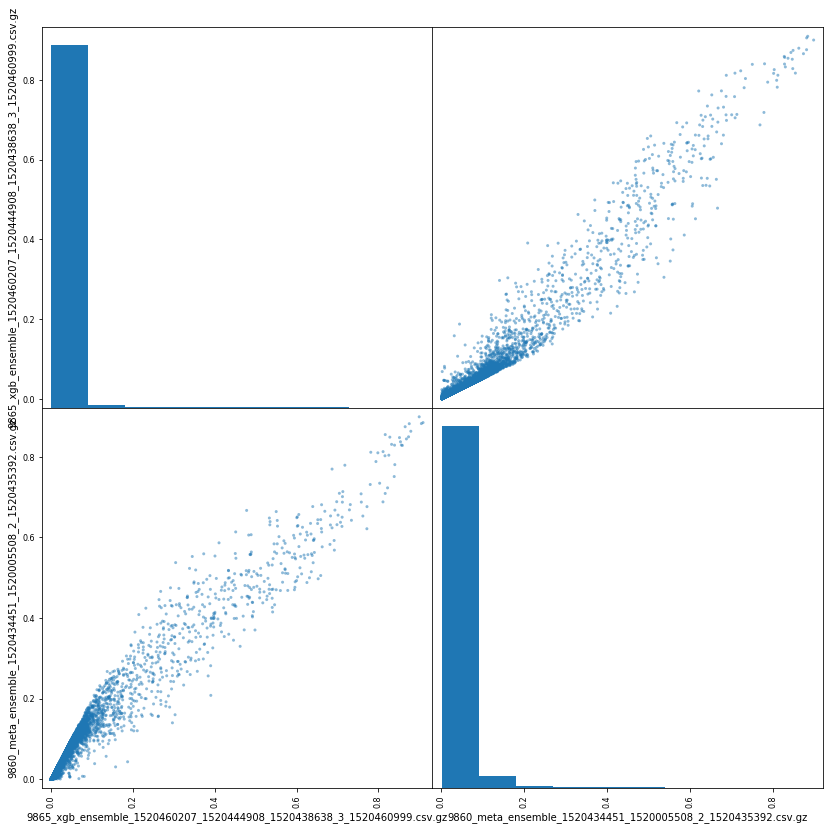

In [115]:
scatter_per_label(xgb_topn_repo, 'threat', 50000)

In [116]:
tempid = ''
for selected in select_to_essemble:
    temp = selected.split('_')[-1].split('.')[0]
    print(temp)
    tempid += temp + '_'
print(tempid)

1520435392
1520460999
1520435392_1520460999_


In [117]:
essemble_name = 'xgb_meta_ensemble_1520435392_1520460999_'
preds.to_csv(path+essemble_name+'_{}_{}.csv.gz'.format(cnt, int(time.time())), index=False, compression='gzip')